In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(2*n_data, 1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, 1)
# print(
#         "\nn_data:",n_data,
#         "\nx0:",x0,
#         "\ny0:",y0
# )

In [2]:
x1 = torch.normal(-2*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, 1)

# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # LongTensor = 64-bit integer
# print(x,y)

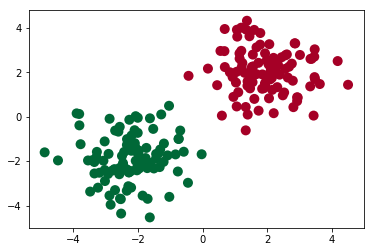

In [3]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

# 画图
# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()

In [4]:
class Net(torch.nn.Module):     # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.out = torch.nn.Linear(n_hidden, n_output)       # 输出层线性输出

    def forward(self, x):
        # 正向传播输入值, 神经网络分析出输出值
        x = torch.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.out(x)                 # 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2) # 几个类别就几个 output

print(net)  # net 的结构

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [5]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)  # 传入 net 的所有参数, 学习率
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)

# 分类问题常用的损失函数为交叉熵( Cross Entropy Loss)
loss_func = torch.nn.CrossEntropyLoss()

for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值

    loss = loss_func(out, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上
    if(t%10 == 0):
        print("\n\n\n",[p for p in net.parameters()],"\n\n\n")




 [Parameter containing:
tensor([[ 0.5439, -0.4960],
        [-0.3886, -0.6253],
        [ 0.5577,  0.5777],
        [-0.7011, -0.3045],
        [-0.4931,  0.5929],
        [ 0.3803,  0.6187],
        [-0.1534,  0.5269],
        [-0.2757,  0.4176],
        [ 0.6497, -0.3548],
        [ 0.5745,  0.6844]], requires_grad=True), Parameter containing:
tensor([ 0.4293, -0.3395,  0.3864,  0.6813, -0.4340,  0.1478,  0.0460, -0.6316,
        -0.0751, -0.6518], requires_grad=True), Parameter containing:
tensor([[ 0.1419,  0.0622,  0.2936,  0.0555, -0.0686,  0.1322, -0.2409, -0.0524,
          0.1072, -0.2648],
        [-0.0408, -0.0674,  0.2943,  0.3229, -0.1649, -0.1086,  0.1758,  0.0395,
         -0.2169,  0.2965]], requires_grad=True), Parameter containing:
tensor([-0.2560, -0.0690], requires_grad=True)] 






 [Parameter containing:
tensor([[ 0.5635, -0.4762],
        [-0.3835, -0.6206],
        [ 0.5666,  0.5886],
        [-0.7211, -0.3231],
        [-0.4884,  0.5996],
        [ 0.4078, 